# 2D static arrays

Declaring a 2D static array works similar as working with 1D static arrays.

`type name [ size 1][ size 2]`

Declaration needs:
* `type`
* `name` - identifier like any other variable
* `size_1` and `size_2` - **MUST** be known at compilation time

* Storage is continuous in memory - see below
* Occupies size 1 x size 2 x sizeof(type) B
* element access with double square brackets: `[ ][ ]`

`int tabA[2][3];` - declares an array of 6 int  
`double tabB[5][3];` - an array of 15 doubles

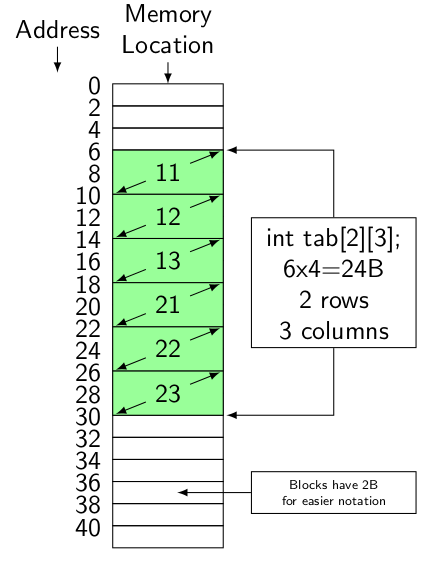

```
int tab [2][3];

tab [0][0]=11;
tab [0][1]=12;
tab [0][2]=13;

tab [1][0]=21;
tab [1][1]=22;
tab [1][2]=23;
```

##### Some examples:
Declare a 2D array of ints and fill it with data using `[ ][ ]`, than print some values

In [12]:
#include <stdio.h>

int main()
{
    int a[4][3]; // 4 x 3 array of ints
    
    a[0][0] = 0;
    a[0][1] = 1;
    a[0][2] = 2;
    
    a[1][0] = 10;
    a[1][1] = 11;
    a[1][2] = 12;
    
    a[2][0] = 20;
    a[2][1] = 21;
    a[2][2] = 22;
    
    a[3][0] = 30;
    a[3][1] = 31;
    a[3][2] = 32;
    
    printf("%d %d %d", a[0][0], a[1][1], a[3][2]);
}

0 11 32

We will now modify the program a bit, to illustrate that the storage in memory is continuous. We do this by retrieving the address of the first element and than by increasing it by one.

In [16]:
#include <stdio.h>

int main()
{
    int a[4][3]; // 4 x 3 array of ints
    
    a[0][0] = 0;
    a[0][1] = 1;
    a[0][2] = 2;
    
    a[1][0] = 10;
    a[1][1] = 11;
    a[1][2] = 12;
    
    a[2][0] = 20;
    a[2][1] = 21;
    a[2][2] = 22;
    
    a[3][0] = 30;
    a[3][1] = 31;
    a[3][2] = 32;
    
    int *p = &a[0][0];
    
    printf("%p %d\n", p, *p);
    ++p;
    printf("%p %d\n", p, *p);
    ++p;
    printf("%p %d\n", p, *p);
    ++p;
    printf("%p %d\n", p, *p);
    ++p;
    printf("%p %d\n", p, *p);
    ++p;
    printf("%p %d\n", p,  *p);
}

0x7fffccfb03b0 0
0x7fffccfb03b4 1
0x7fffccfb03b8 2
0x7fffccfb03bc 10
0x7fffccfb03c0 11
0x7fffccfb03c4 12


Print addresses of first elements in each row, what is the distance between them?

In [17]:
#include <stdio.h>

int main()
{
    int a[4][3];
       
    printf("%p %p\n", &a[0][0], &a[0][1]);
    printf("%p %p\n", &a[1][0], &a[1][1]);
}

0x7fffec54e080 0x7fffec54e084
0x7fffec54e08c 0x7fffec54e090


Conclusion: storage is continuous and elements are separated by row size

In [18]:
#include <stdio.h>
#define MAX_SIZE1 500
#define MAX_SIZE2 100

int main()
{
    int a[MAX_SIZE1][MAX_SIZE2]; // larger array
    
    int x = 5; // actual size of a 2D array
    int y = 10;
    
    // .. work with this array
       
    printf("%p %p\n", &a[0][0], &a[0][1]);
    printf("%p %p\n", &a[1][0], &a[1][1]);
}

0x7fff9cc036b0 0x7fff9cc036b4
0x7fff9cc03840 0x7fff9cc03844


We see that the row size (the number of columns) is important. The reason for that is that by changing the value in the second bracket we move by a single pointer (single address), by changing the value in the first bracket we need to move by the entire row. This value can only be known if we know exactly how many columns there are!

A consequence is that a 2D array might be treated as a 1D array in some situations but not in others.  
1. Storage is continuous!

In [19]:
#include <stdio.h>

int main()
{
    int a[4][3]; // full use
    int *p = &a[0][0]; // adraess and an array are the same?
    
    for(int i=0; i<10; ++i)
        p[i] = i;
    
    printf("%d %d %d", a[2][0], a[2][1], a[2][2]);
}

6 7 8

Can the 1D array be treated as a 2D? Yes, and no. There is a but. So the size of a row would have to be known. 

When writing functions working with 2D arrays we need to remember to provide the second dimension!

Write a function that fills and prints the content of a 2D array of integers:

In [23]:
#include <stdio.h>

void fill (int tab[  ][10], int n, int m);
void print(int tab[10][10], int n, int m);

int main()
{
    int tab[10][10];
    int n=6, m=3; // rows and collumns
    fill(tab, n, m);
    print(tab, n, m);
}

void fill(int tab[][10], int n, int m)
{
    for(int i=0; i<n; ++i)
    {
        for(int j=0; j<m; ++j)
        {
            tab[i][j] = 100*i+10*j;
        }
    }
}

void print(int tab[10][10], int n, int m)
{
    for(int i=0; i<n; ++i)
    {
        for(int j=0; j<m; ++j)
        {
            printf("%d \t", tab[i][j]);
        }
        printf("\n");
    }
}

0 	10 	20 	
100 	110 	120 	
200 	210 	220 	
300 	310 	320 	
400 	410 	420 	
500 	510 	520 	


A different way to initialize arrays:

1D

In [27]:
#include <stdio.h>
int main(){
    int a[] = {1,2,3};
    printf("%d %d %d", a[0], a[1], a[2]);
}

1 2 3

2D is also possible, but as with functions the size of a row (number of collumns must be known).

In [32]:
#include <stdio.h>
int main(){
    int a[][2] = {1,2,3,4,5,6};
    printf("%d %d %d %d", a[0][0], a[0][1], a[1][0], a[1][1]);
}

1 3 3 5

### An example
* Write a program illustrating workings of a 2D static array
* Add initialization function
* Distinguish the maximum size of an array, and the one used by the program
* Illustrate how to write functions with 2D arrays
* Add a function printing a 2D array
* Add a function coping to a 1D vector the diagonal from a square matrix
* Write a function coping a row, column from a 2D array
* Write a function inserting a row column into a 2D array

In [65]:
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#define MAX_SIZE 100

void init();
void fill(int tab[][MAX_SIZE], int n);
void print(int tab[][MAX_SIZE], int n);
void print1d(int input[], int n);
void copy_diag(int tab[][MAX_SIZE], int n, int output[]);
void put_col(int tab[][MAX_SIZE], int n, int input[], int col);


int main()
{
    init();
    printf("Hello!\n");
    
    int tab[MAX_SIZE][MAX_SIZE];
    int size = 5;
    if(size > MAX_SIZE)
    {
        printf("Use smaller size!\n");
        return -1;
    }
    
    fill(tab, size);
    print(tab, size);
    
    int d[size];
    copy_diag(tab, size, d);
    print1d(d, size);
    
    put_col(tab, size, d, 2);
    print(tab, size);
}

void init()
{
    srand(time(NULL));
}

// initialise square array
void fill(int tab[][MAX_SIZE], int n)
{
     for(int i=0; i<n; ++i)
         for(int j=0; j<n; ++j)
             tab[i][j] = rand()%10; // from 0 to 9
}

// print the square array
void print(int tab[][MAX_SIZE], int n)
{
     for(int i=0; i<n; ++i)
     {
         for(int j=0; j<n; ++j)
         {
             printf("(%d,%d)=%d \t", i, j, tab[i][j]);//tab[i][j]);
         }
         printf("\n");
     }
}
void print1d(int input[], int n)
{
    for(int i=0; i<n; ++i)
    {
        printf("%d ", input[i]);
    }
    printf("\n");
}

void copy_diag(int tab[][MAX_SIZE], int n, int output[])
{
    for(int i=0; i<n; ++i)
    {
        output[i] = tab[i][i];
    }
}

void put_col(int tab[][MAX_SIZE], int n, int input[], int col)
{
    for(int i=0; i<n; ++i)
    {
        tab[i][col] = input[i];
    }
}

Hello!
(0,0)=6 	(0,1)=5 	(0,2)=4 	(0,3)=6 	(0,4)=4 	
(1,0)=2 	(1,1)=2 	(1,2)=0 	(1,3)=8 	(1,4)=8 	
(2,0)=7 	(2,1)=2 	(2,2)=2 	(2,3)=7 	(2,4)=8 	
(3,0)=6 	(3,1)=0 	(3,2)=4 	(3,3)=1 	(3,4)=5 	
(4,0)=7 	(4,1)=7 	(4,2)=9 	(4,3)=2 	(4,4)=7 	
6 2 2 1 7 
(0,0)=6 	(0,1)=5 	(0,2)=6 	(0,3)=6 	(0,4)=4 	
(1,0)=2 	(1,1)=2 	(1,2)=2 	(1,3)=8 	(1,4)=8 	
(2,0)=7 	(2,1)=2 	(2,2)=2 	(2,3)=7 	(2,4)=8 	
(3,0)=6 	(3,1)=0 	(3,2)=1 	(3,3)=1 	(3,4)=5 	
(4,0)=7 	(4,1)=7 	(4,2)=7 	(4,3)=2 	(4,4)=7 	


In [16]:
#include <stdio.h>
#define MAX_SIZE 100

void fill(int tab[MAX_SIZE][MAX_SIZE], int n, int m);
void print(int tab[MAX_SIZE][MAX_SIZE], int n, int m);
void diag(int tab[][MAX_SIZE], int n, int d[]);
void print1D(int tab[], int n);
int* copy1(int tab[][MAX_SIZE], int n);
void copy(int tab[][MAX_SIZE], int n, int row, int d[]);
void insert_collumn(int tab[][MAX_SIZE], int n, int col, int d[]);

int main()
{
    int tab[MAX_SIZE][MAX_SIZE];
    int n=6, m=6; // rows and collumns
    
    fill(tab, n, m);
    print(tab, n, m);
    printf("--------\n");
    
    int d[MAX_SIZE];
    diag(tab, n, d);
    print1D(d, n);
    printf("--------\n");
    
    int *p = copy1(tab, 3);
    print1D(p, n);
    
    copy(tab, n, 2, d);
    print1D(d, n);
    printf("--------\n");
    p[1] = 1000;
    d[1] = 1000;
    print(tab, n, m);
    printf("--------\n");
    insert_collumn(tab, n, 1, d);
    insert_collumn(tab, n, 3, p);
    print(tab, n, m);
}

void fill(int tab[][MAX_SIZE], int n, int m)
{
    for(int i=0; i<n; ++i)
    {
        for(int j=0; j<m; ++j)
        {
            tab[i][j] = 100*i+10*j;
        }
    }
}

void print(int tab[][MAX_SIZE], int n, int m)
{
    for(int i=0; i<n; ++i)
    {
        for(int j=0; j<m; ++j)
        {
            printf("%d \t", tab[i][j]);
        }
        printf("\n");
    }
}
void print1D(int tab[], int n)
{
    for(int i=0; i<n; ++i)
    {
        printf("%d \t", tab[i]);
    }
    printf("\n");
}

void diag(int tab[][MAX_SIZE], int n, int d[])
{
    for(int i=0; i<n; ++i)
    {
        d[i] = tab[i][i];
    }
}

//An address of the first element of a row
int* copy1(int tab[][MAX_SIZE], int n)
{
    return &tab[n][0];
}

void copy(int tab[][MAX_SIZE], int n, int row, int d[])
{
    for(int i=0; i<n; ++i)
    {
        d[i] = tab[row][i];
    }
}

void insert_collumn(int tab[][MAX_SIZE], int n, int col, int d[])
{
    for(int i=0; i<n; ++i)
    {
        tab[i][col] = d[i];
    }
}


0 	10 	20 	30 	40 	50 	
100 	110 	120 	130 	140 	150 	
200 	210 	220 	230 	240 	250 	
300 	310 	320 	330 	340 	350 	
400 	410 	420 	430 	440 	450 	
500 	510 	520 	530 	540 	550 	
--------
0 	110 	220 	330 	440 	550 	
--------
300 	310 	320 	330 	340 	350 	
200 	210 	220 	230 	240 	250 	
--------
0 	10 	20 	30 	40 	50 	
100 	110 	120 	130 	140 	150 	
200 	210 	220 	230 	240 	250 	
300 	1000 	320 	330 	340 	350 	
400 	410 	420 	430 	440 	450 	
500 	510 	520 	530 	540 	550 	
--------
0 	200 	20 	300 	40 	50 	
100 	1000 	120 	1000 	140 	150 	
200 	220 	220 	320 	240 	250 	
300 	230 	320 	330 	340 	350 	
400 	240 	420 	340 	440 	450 	
500 	250 	520 	350 	540 	550 	


In [69]:
#include <stdio.h>

int main()
{
    for (int i=1; i<=1000; i+=2)
    {
        if(i % 9 == 0) continue;
        printf("%d ", i);
    }
}

1 3 5 7 11 13 15 17 19 21 23 25 29 31 33 35 37 39 41 43 47 49 51 53 55 57 59 61 65 67 69 71 73 75 77 79 83 85 87 89 91 93 95 97 101 103 105 107 109 111 113 115 119 121 123 125 127 129 131 133 137 139 141 143 145 147 149 151 155 157 159 161 163 165 167 169 173 175 177 179 181 183 185 187 191 193 195 197 199 201 203 205 209 211 213 215 217 219 221 223 227 229 231 233 235 237 239 241 245 247 249 251 253 255 257 259 263 265 267 269 271 273 275 277 281 283 285 287 289 291 293 295 299 301 303 305 307 309 311 313 317 319 321 323 325 327 329 331 335 337 339 341 343 345 347 349 353 355 357 359 361 363 365 367 371 373 375 377 379 381 383 385 389 391 393 395 397 399 401 403 407 409 411 413 415 417 419 421 425 427 429 431 433 435 437 439 443 445 447 449 451 453 455 457 461 463 465 467 469 471 473 475 479 481 483 485 487 489 491 493 497 499 501 503 505 507 509 511 515 517 519 521 523 525 527 529 533 535 537 539 541 543 545 547 551 553 555 557 559 561 563 565 569 571 573 575 577 579 581 583 587 589 

In [73]:
//%cflags:-lm

#include <stdio.h>
#include <math.h>

double fun(double a, double b, double c)
{
    double res=0;
    
    for(int i=1; i<=40; ++i)
    {
        double tmp=a * exp(1.0 / (1.0 + (double)i) + 1.0 / b );
        res += tmp;
    }
    
    return res;
}

int main()
{
    
}

In [ ]:
#include <stdio.h>

double fun(int n)
{
    double res = 0;
    double x = 2.0;
    
    if (n==0) res = 1.0/x;
    
    for (int i=1; i<n; ++i)
    {
        x = -0.5 * x * sqrt(fabs(x));
        res += pow(-1, i+1) * 1.0 / x;
    }
    
    return exp(res);
}